In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numberline import *
import voting_rules as rules
from utility import get_continuous_weights, calculate_loss

# Initial Setup and Testing

In [2]:
min_val = 0
max_val = 10
size = 4

true_pref = (max_val - min_val) / 2 + min_val
vals = np.random.uniform(low=min_val, high=max_val, size=size)
print(vals)

[9.21790034 5.54548623 7.87668891 7.2310282 ]


In [3]:
unweighted_result_mean = rules.mean(vals)
unweighted_loss_mean = calculate_loss(unweighted_result_mean, true_pref)

weighted_vals = get_continuous_weights(vals, min_val, max_val)
weighted_result_mean = rules.weighted_mean(weighted_vals)
weighted_loss_mean = calculate_loss(weighted_result_mean, true_pref)

print("MEAN")
print(f"True preference: {true_pref}")
print(f"Unweighted result: {unweighted_result_mean}")
print(f"\tLoss: {unweighted_loss_mean}")
print(f"Weighted result: {weighted_result_mean}")
print(f"\tLoss: {weighted_loss_mean}")
print(
    f"Better result: {'UNWEIGHTED' if unweighted_loss_mean <= weighted_loss_mean else 'WEIGHTED'}")
print(f"\tDifference: {abs(unweighted_loss_mean - weighted_loss_mean)}")

MEAN
True preference: 5.0
Unweighted result: 7.46777592148529
	Loss: 6.089917998662574
Weighted result: 6.507036884971373
	Loss: 2.271160172664219
Better result: WEIGHTED
	Difference: 3.818757825998355


In [4]:
unweighted_result_median = rules.median(vals)
unweighted_loss_median = calculate_loss(unweighted_result_median, true_pref)

weighted_vals = get_continuous_weights(vals, min_val, max_val)
weighted_result_median = rules.weighted_median(weighted_vals)
weighted_loss_median = calculate_loss(weighted_result_median, true_pref)

print("MEDIAN")
print(f"True preference: {true_pref}")
print(f"Unweighted result: {unweighted_result_median}")
print(f"\tLoss: {unweighted_loss_median}")
print(f"Weighted result: {weighted_result_median}")
print(f"\tLoss: {weighted_loss_median}")
print(
    f"Better result: {'UNWEIGHTED' if unweighted_loss_median <= weighted_loss_median else 'WEIGHTED'}")
print(f"\tDifference: {abs(unweighted_loss_median - weighted_loss_median)}")

MEDIAN
True preference: 5.0
Unweighted result: 7.231028196959919
	Loss: 4.977486815630226
Weighted result: 5.545486234358519
	Loss: 0.29755523187463684
Better result: WEIGHTED
	Difference: 4.6799315837555895


True preference: green
Unweighted result: red
Weighted result: purple

Best weighted rule: MEDIAN
Best unweighted rule: MEDIAN


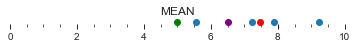

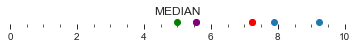

In [5]:
print(f"True preference: green")
print(f"Unweighted result: red")
print(f"Weighted result: purple")

print()
print(
    f"Best weighted rule: {'MEDIAN' if weighted_loss_median < weighted_loss_mean else 'TIE' if weighted_loss_median == weighted_loss_mean else 'MEAN'}")
print(
    f"Best unweighted rule: {'MEDIAN' if unweighted_loss_median < unweighted_loss_mean else 'TIE' if unweighted_loss_median == unweighted_loss_mean else 'MEAN'}")

ax = numberline(vals, min_val, max_val)
ax.scatter(true_pref, 0, clip_on=False, zorder=3, color='green')
ax.scatter(unweighted_result_mean, 0, clip_on=False, zorder=3, color='red')
ax.scatter(weighted_result_mean, 0, clip_on=False, zorder=3, color='purple')
plt.title("MEAN")

ax = numberline(vals, min_val, max_val)
ax.scatter(true_pref, 0, clip_on=False, zorder=3, color='green')
ax.scatter(unweighted_result_median, 0, clip_on=False, zorder=3, color='red')
ax.scatter(weighted_result_median, 0, clip_on=False, zorder=3, color='purple')
plt.title("MEDIAN");

# Mimic Paper Results

In [6]:
samples = 100
max_voters = 100

min_val = 0
max_val = 10
true_pref = (max_val - min_val) / 2 + min_val

mechanisms = {
    "mean"           : rules.mean,
    "weighted_mean"  : lambda v: rules.weighted_mean(
        get_continuous_weights(v, min_val, max_val)),
    "median"         : rules.median,
    "weighted_median": lambda v: rules.weighted_median(
        get_continuous_weights(v, min_val, max_val)),
}

df_data = pd.DataFrame(columns=["voters", "rule", "result", "loss"])

for voters in range(1, max_voters + 1):
   for rule, exe in mechanisms.items():
      for _ in range(samples):
         vals = np.random.uniform(low=min_val, high=max_val, size=voters)
         result = exe(vals)
         loss = calculate_loss(result, true_pref)
         df_data.loc[len(df_data)] = [voters, rule, result, loss]
df_data

,voters,rule,result,loss
0,1,mean,7.034982,4.141150
1,1,mean,8.455953,11.943611
2,1,mean,1.147192,14.844126
3,1,mean,0.417284,21.001286
4,1,mean,2.736659,5.122715
...,...,...,...,...
39995,100,weighted_median,5.080732,0.006518
39996,100,weighted_median,5.096176,0.009250
39997,100,weighted_median,4.996487,0.000012
39998,100,weighted_median,4.923808,0.005805


In [7]:
df_means = df_data.groupby(["voters", "rule"]).mean()
df_means

result      loss
voters rule                               
1      mean             4.947902  8.199986
       median           4.598779  9.251498
       weighted_mean    4.769935  7.651581
       weighted_median  5.065614  8.266248
2      mean             5.030749  3.595933
...                          ...       ...
99     weighted_median  5.012826  0.005818
100    mean             5.020832  0.069836
       median           4.906306  0.218174
       weighted_mean    4.999871  0.000012
       weighted_median  5.007289  0.006793

[400 rows x 2 columns]

In [8]:
df_mean_ratios = df_means.loc[:, "mean", :] / df_means.loc[:, "weighted_mean", :]
df_mean_ratios["rule"] = "mean"
df_mean_ratios["log_loss_ratio"] = np.log(df_mean_ratios["loss"])
df_mean_ratios

,result,loss,rule,log_loss_ratio
voters,,,,
1,1.037310,1.071672,mean,0.069220
2,1.028386,1.216271,mean,0.195790
3,1.031081,3.379220,mean,1.217645
4,1.049641,3.072024,mean,1.122337
5,0.976716,2.261237,mean,0.815912
...,...,...,...,...
96,1.007201,4844.398534,mean,8.485578
97,0.996698,4463.862123,mean,8.403770
98,0.994175,14302.278292,mean,9.568174


In [9]:
df_median_ratios = df_means.loc[:, "median", :] / df_means.loc[:, "weighted_median", :]
df_median_ratios["rule"] = "median"
df_median_ratios["log_loss_ratio"] = np.log(df_median_ratios["loss"])
df_median_ratios

,result,loss,rule,log_loss_ratio
voters,,,,
1,0.907842,1.119189,median,0.112605
2,0.661650,1.830292,median,0.604475
3,0.900216,2.207154,median,0.791704
4,0.829112,2.521505,median,0.924856
5,0.981604,2.495190,median,0.914365
...,...,...,...,...
96,0.998974,48.466921,median,3.880882
97,0.982932,83.293033,median,4.422365
98,0.999297,28.752324,median,3.358719


<AxesSubplot:xlabel='voters', ylabel='log_loss_ratio'>

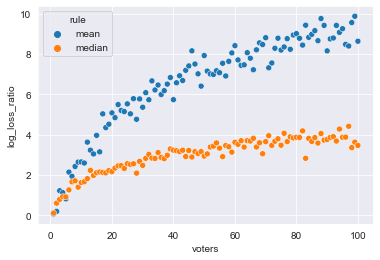

In [10]:
df_combined_ratios = pd.concat([df_mean_ratios, df_median_ratios]).reset_index()
sns.scatterplot(x="voters", y="log_loss_ratio", hue="rule", data=df_combined_ratios)

<AxesSubplot:xlabel='voters', ylabel='loss'>

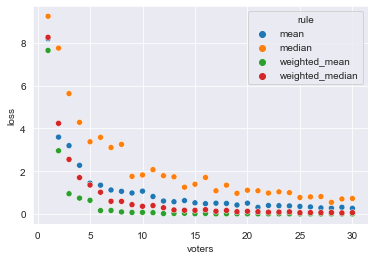

In [11]:
sns.scatterplot(x="voters", y="loss", hue="rule", data=df_means.loc[0:30])